In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

Loading data...


X
        feature1  feature2  feature3  feature4  feature5  feature6    ...      feature16  feature17  feature18  feature19  feature20  feature21
id                                                                    ...                                                                      
444373   0.25519   0.40359   0.83019   0.31328   0.26406   0.56522    ...        0.19624    0.80862    0.81713    0.45656    0.66848    0.51978
428195   0.25758   0.25156   0.86383   0.21293   0.24924   0.44582    ...        0.17287    0.84306    0.86019    0.43066    0.77478    0.65628
376544   0.26186   0.43509   0.80882   0.29978   0.28310   0.59847    ...        0.21483    0.79095    0.80687    0.43324    0.67210    0.51170
440255   0.26647   0.42487   0.81401   0.22889   0.27456   0.55654    ...        0.20237    0.79605    0.82971    0.45757    0.69761    0.53739
466869   0.27095   0.47533   0.76479   0.33366   0.36695   0.72217    ...        0.19048    0.75914    0.74903    0.

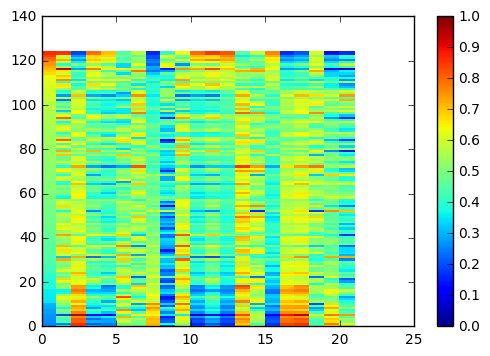

done


In [14]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from IPython.display import display
from itertools import combinations


#!/usr/bin/env python

"""
Example classifier on Numerai data using a logistic regression classifier.
To get started, install the required packages: pip install pandas, numpy, sklearn
"""

import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model


pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 230)


def show_heatmap(dataframe):
    
    dataframe.fillna(0.0, inplace=True)
    
    
    
    # plt.imshow(, cmap=plt.cm.gray)
    plt.pcolor(dataframe, vmin=0, vmax=1)
    #plt.yticks(np.arange(0.5, len(dataframe.index), 1), dataframe.index)
    #plt.xticks(np.arange(0.5, len(dataframe.columns), 1), dataframe.columns)
    plt.colorbar()
    plt.show()
    
def extract_feature_df(dataframe, sort_col=None):
    
    dataframe = dataframe.copy()
    
    if sort_col:
        dataframe.sort_values(sort_col, inplace=True)
    
    
    features = [f for f in list(dataframe) if "feature" in f]
    X = dataframe[features].copy()                     # pd.DataFrame of all training features
    Y = dataframe["target"].copy()                     # pd.Series of the classes
    #x_prediction = prediction_data[features].copy()        # pd.DataFrame of all validation and test features
    
    return X, Y

def main():
    # Set seed for reproducibility
    np.random.seed(0)

    print("Loading data...")
    # Load the data from the CSV files
    ''' training data contains only training data'''
    training_data = pd.read_csv('numerai_training_data.csv', header=0)
    '''
    prediction_data contains both validation data (with targets) and test data
    (without targets)
    '''
    prediction_data = pd.read_csv('numerai_tournament_data.csv', header=0)

    # print('\n')
    # print('prediction_data')
    # print(prediction_data)


    # Transform the loaded CSV data into numpy arrays
    '''
    Goes through all the pd.DataFrame columns titles. If they contain 'feature'
    they are added to the features list
    '''
    
    training_data.set_index(['id'], drop=True, inplace=True)
    
    training_data = training_data[training_data['data_type'] == 'train']
    
    
    era1 = training_data[training_data['era']=='era1'].copy()
    
    #print(era1.sort_values)
    
    #grouped = training_data.groupby('era')
    
    X, Y = extract_feature_df(era1,'feature1')
    
    print('\n')
    print('X')
    print(X)
    
    print(X.iloc[1])
    
    print('starting')
    show_heatmap(X)
    print ('done')

if __name__ == '__main__':
    main()
